In [52]:
import pandas as pd
from retsupp.utils.data import Subject

In [53]:
sub = Subject(1)

confounds = sub.get_confounds()

In [55]:
confounds['cosine00']

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.087873
         ...   
258   -0.087744
259   -0.087796
260   -0.087835
261   -0.087860
262   -0.087873
Name: cosine00, Length: 263, dtype: float64

In [56]:
def filter_confounds(confounds, n_acompcorr=10):

    confound_cols = ['dvars', 'framewise_displacement']

    a_compcorr_cols = [f"a_comp_cor_{i:02d}" for i in range(n_acompcorr)]
    confound_cols += a_compcorr_cols

    motion_cols = ['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']
    motion_cols += [f'{e}_derivative1' for e in motion_cols]
    confound_cols += motion_cols

    steady_state_cols = [c for c in confounds.columns if 'non_steady_state' in c]
    confound_cols += steady_state_cols

    outlier_cols = [c for c in confounds.columns if 'motion_outlier' in c]
    confound_cols += outlier_cols

    cosine_cols = [c for c in confounds.columns if 'cosine' in c]
    confound_cols += cosine_cols

    
    return confounds[confound_cols].fillna(0)

In [57]:
from nilearn.signal import clean

from nilearn import image

In [58]:
confounds

,global_signal,global_signal_derivative1,global_signal_derivative1_power2,global_signal_power2,csf,csf_derivative1,csf_power2,csf_derivative1_power2,white_matter,white_matter_derivative1,...,motion_outlier01,motion_outlier02,motion_outlier03,motion_outlier04,motion_outlier05,motion_outlier06,motion_outlier07,motion_outlier08,motion_outlier09,motion_outlier10
0,764.743957,NaN,NaN,584833.320306,929.771612,NaN,864475.251127,NaN,641.079239,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,759.822503,-4.921454,24.220710,577330.236533,926.331207,-3.440406,858089.504711,11.836390,637.090030,-3.989209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,757.883834,-1.938669,3.758438,574387.905939,924.718213,-1.612994,855103.772576,2.601751,637.233413,0.143383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,758.018682,0.134848,0.018184,574592.322676,927.724856,3.006644,860673.409088,9.039907,638.826651,1.593237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,758.163137,0.144455,0.020867,574811.342059,923.835437,-3.889419,853471.915182,15.127581,638.280648,-0.546003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,741.535876,-1.293901,1.674181,549875.454983,913.886596,-1.134991,835188.709778,1.288205,630.088095,0.615999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,742.178146,0.642270,0.412511,550828.399824,914.984893,1.098297,837197.354398,1.206257,629.327779,-0.760316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260,746.108709,3.930564,15.449330,556678.205893,922.796760,7.811867,851553.859588,61.025260,630.042047,0.714268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261,749.723291,3.614582,13.065202,562085.013077,928.231707,5.434948,861614.102518,29.538657,632.430537,2.388490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
im1 = '/data/ds-retsupp/derivatives/fmriprep/sub-01/ses-1/func/sub-01_ses-1_task-search_rec-NORDIC_run-1_space-T1w_desc-preproc_bold.nii.gz'

image.clean_img(im1, confounds=filter_confounds(confounds), detrend=False, standardize='psc')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/signal.py:122: RuntimeWarning: invalid value encountered in divide
  signals = (signals - mean_signals) / np.absolute(mean_signals)
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/signal.py:126: UserWarning: psc standardization strategy is meaningless for features that have a mean of 0. These time series are set to 0.
  warnings.warn(


In [72]:
im_ = _69

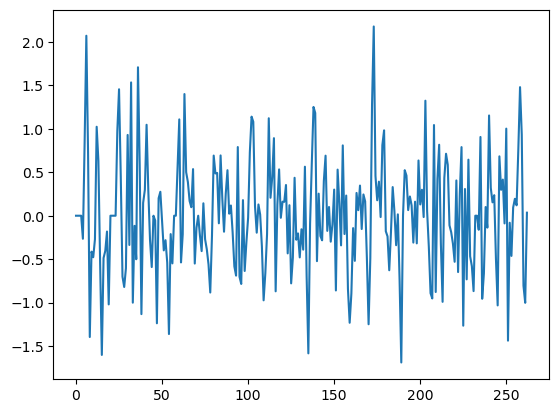

In [73]:
import matplotlib.pyplot as plt
plt.plot(im_.get_fdata()[50, 50, 50])

In [ ]:
!ls /data/ds-retsupp/derivatives/fmriprep/sub-0
s1/ses01/func/

dataset_description.json logs                     sub-01.html
desc-aparcaseg_dseg.tsv  sourcedata               sub-02
desc-aseg_dseg.tsv       sub-01                   sub-02.html


In [42]:
clean?

Signature:
clean(
    signals,
    runs=None,
    detrend=True,
    standardize='zscore',
    sample_mask=None,
    confounds=None,
    standardize_confounds=True,
    filter='butterworth',
    low_pass=None,
    high_pass=None,
    t_r=2.5,
    ensure_finite=False,
    extrapolate=True,
    **kwargs,
)
Docstring:
Improve :term:`SNR` on masked :term:`fMRI` signals.

This function can do several things on the input signals. With the default
options, the procedures are performed in the following order:

- detrend
- low- and high-pass butterworth filter
- remove confounds
- standardize

Low-pass filtering improves specificity.

High-pass filtering should be kept small, to keep some sensitivity.

Butterworth filtering is only meaningful on evenly-sampled signals.

When performing scrubbing (censoring high-motion volumes) with butterworth
filtering, the signal is processed in the following order, based on the
second recommendation in :footcite:t:`Lindquist2018`:

- interpolate high motion v